# Vista inicial
Esta sección muestra las dimensiones iniciales del dataset y las primeras tres filas para obtener una vista previa de los datos. Esto ayuda a verificar la estructura y el contenido del dataset antes de realizar cualquier análisis o preprocesamiento.


EDA 2 - Análisis Bivariado
Dataset: Green Taxi Trip Records (NYC TLC)


1. Importar librerías

In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


Configuración general de gráficos

In [15]:
# Configuración general de gráficos
plt.style.use("seaborn-v0_8")
sns.set_palette("viridis")

# 2. Cargar dataset (Parquet desde URL)
url_2 = "https://d37ci6vzurychx.cloudfront.net/trip-data/green_tripdata_2025-06.parquet"
registros_viajes_eco = pd.read_parquet(url_2, engine="pyarrow")

In [17]:
# Vista inicial
print("Dimensiones del dataset:", registros_viajes_eco.shape)
(registros_viajes_eco.head(3))

Dimensiones del dataset: (49390, 21)


,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,...,mta_tax,tip_amount,tolls_amount,ehail_fee,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge,cbd_congestion_fee
0,2,2025-06-01 00:33:43,2025-06-01 01:04:33,N,2.0,74,132,1.0,19.60,70.0,...,0.5,19.61,6.94,NaN,1.0,98.05,1.0,1.0,0.0,0.0
1,2,2025-06-01 00:07:45,2025-06-01 00:14:52,N,1.0,75,74,2.0,1.37,9.3,...,0.5,0.00,0.00,NaN,1.0,11.80,2.0,1.0,0.0,0.0
2,2,2025-06-01 00:24:07,2025-06-01 00:48:24,N,1.0,83,83,1.0,4.11,25.4,...,0.5,0.00,0.00,NaN,1.0,27.90,2.0,1.0,0.0,0.0


In [19]:
# 3. Preprocesamiento básico
# Verificar tipos de datos y convertir columnas de tiempo si es necesario
if not pd.api.types.is_datetime64_any_dtype(registros_viajes_eco["lpep_pickup_datetime"]):
    registros_viajes_eco["lpep_pickup_datetime"] = pd.to_datetime(registros_viajes_eco["lpep_pickup_datetime"], errors="coerce")
if not pd.api.types.is_datetime64_any_dtype(registros_viajes_eco["lpep_dropoff_datetime"]):
    registros_viajes_eco["lpep_dropoff_datetime"] = pd.to_datetime(registros_viajes_eco["lpep_dropoff_datetime"], errors="coerce")

# Crear columna de duración del viaje en minutos
registros_viajes_eco["trip_duration"] = (
    (registros_viajes_eco["lpep_dropoff_datetime"] - registros_viajes_eco["lpep_pickup_datetime"]).dt.total_seconds() / 60
)

# Verificar valores nulos o negativos en las columnas clave
print("Valores nulos antes del filtrado:")
print(registros_viajes_eco[["trip_distance", "fare_amount", "trip_duration"]].isnull().sum())

# Eliminar registros con valores negativos o nulos en variables clave
registros_viajes_eco = registros_viajes_eco[
    (registros_viajes_eco["trip_distance"] > 0) &
    (registros_viajes_eco["fare_amount"] > 0) &
    (registros_viajes_eco["trip_duration"] > 0)
]

# Verificar dimensiones después del filtrado
("Dimensiones después del filtrado:", registros_viajes_eco.shape)

Valores nulos antes del filtrado:
trip_distance    0
fare_amount      0
trip_duration    0
dtype: int64


('Dimensiones después del filtrado:', (47102, 22))

# Preprocesamiento básico
En esta sección se realiza el preprocesamiento de los datos:
1. Se convierten las columnas de tiempo al formato `datetime` si es necesario.
2. Se calcula la duración del viaje en minutos.
3. Se eliminan registros con valores nulos o negativos en las columnas clave (`trip_distance`, `fare_amount`, `trip_duration`).
4. Se verifica el tamaño del dataset después del filtrado.

 EDA 2 - Análisis Bivariado

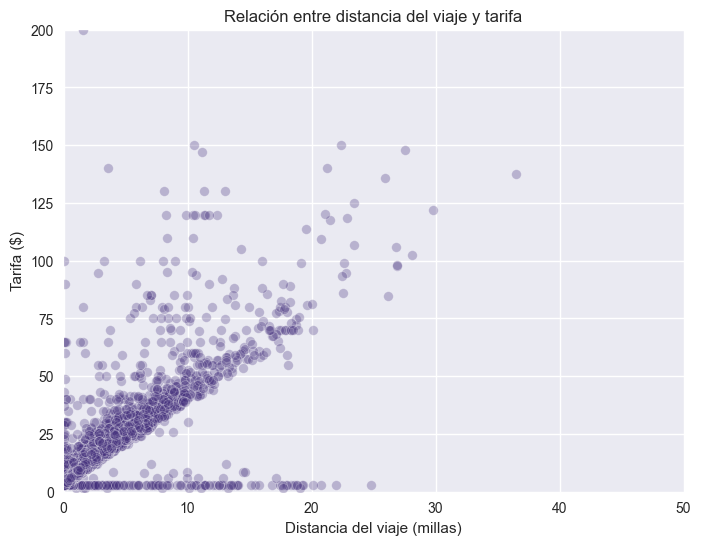

In [20]:
# 4. Scatterplot: trip_distance vs fare_amount
plt.figure(figsize=(8,6))
sns.scatterplot(
    data=registros_viajes_eco.sample(5000, random_state=42),  # muestra para mejor visualización
    x="trip_distance", 
    y="fare_amount", 
    alpha=0.3
)
plt.xlim(0, 50)   # limitar valores extremos
plt.ylim(0, 200)
plt.title("Relación entre distancia del viaje y tarifa")
plt.xlabel("Distancia del viaje (millas)")
plt.ylabel("Tarifa ($)")
plt.show()

# Relación entre distancia y tarifa
Se genera un scatterplot para analizar la relación entre la distancia del viaje y la tarifa. Se utiliza una muestra de 5000 registros para mejorar la visualización y se limitan los valores extremos en los ejes para una mejor interpretación.

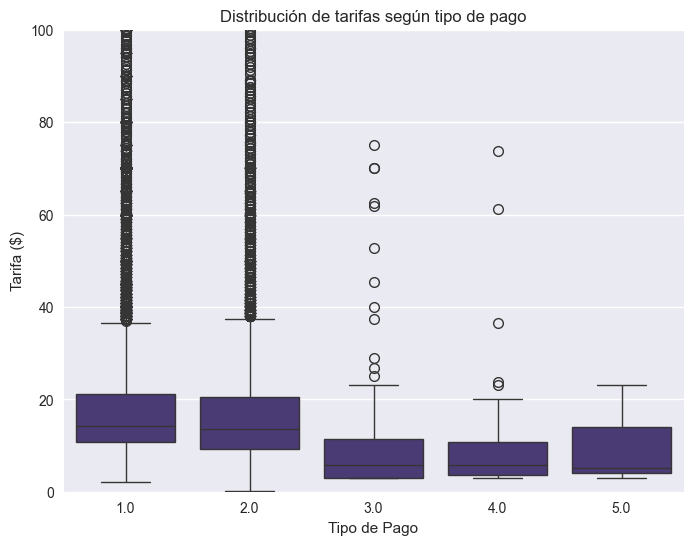

In [21]:
# 5. Boxplot: payment_type vs fare_amount
plt.figure(figsize=(8,6))
sns.boxplot(
    data=registros_viajes_eco, 
    x="payment_type", 
    y="fare_amount"
)
plt.ylim(0, 100)  # limitar valores extremos
plt.title("Distribución de tarifas según tipo de pago")
plt.xlabel("Tipo de Pago")
plt.ylabel("Tarifa ($)")
plt.show()

# Distribución de tarifas según tipo de pago
Se utiliza un boxplot para visualizar la distribución de tarifas según el tipo de pago. Este gráfico permite identificar la mediana, los cuartiles y los valores atípicos, limitando las tarifas a un máximo de $100 para evitar valores extremos.

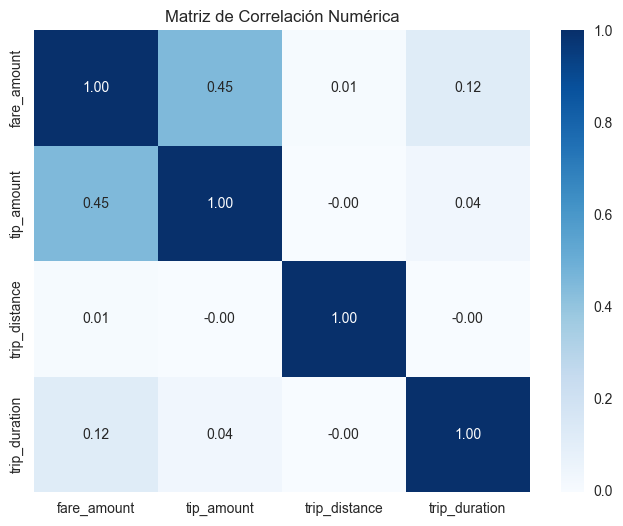

In [22]:
# 6. Matriz de correlación numérica
num_vars = ["fare_amount", "tip_amount", "trip_distance", "trip_duration"]
corr = registros_viajes_eco[num_vars].corr()

plt.figure(figsize=(8,6))
sns.heatmap(corr, annot=True, cmap="Blues", fmt=".2f")
plt.title("Matriz de Correlación Numérica")
plt.show()

# Matriz de correlación numérica
Se calcula y visualiza una matriz de correlación entre variables numéricas clave (`fare_amount`, `tip_amount`, `trip_distance`, `trip_duration`). El mapa de calor muestra los coeficientes de correlación para identificar relaciones entre las variables.

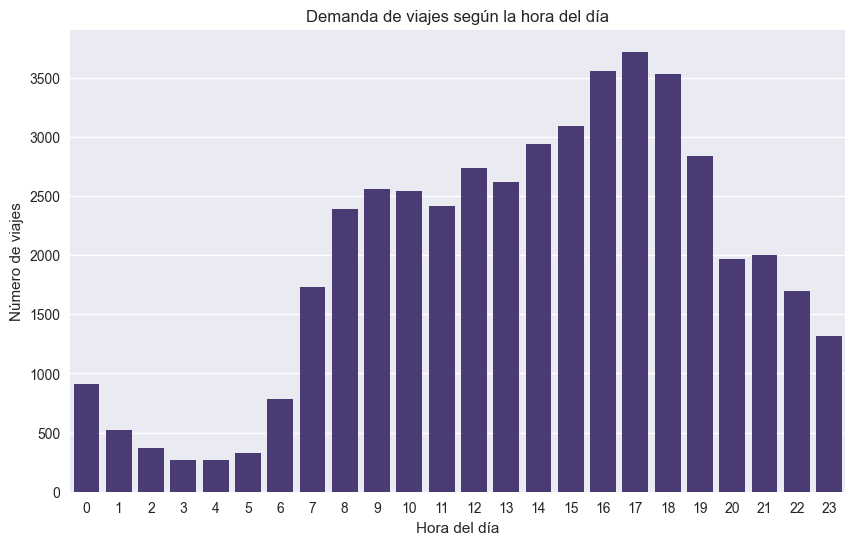

In [27]:
# 7. Análisis temporal: conteo de viajes por hora
registros_viajes_eco["pickup_hour"] = registros_viajes_eco["lpep_pickup_datetime"].dt.hour

plt.figure(figsize=(10,6))
sns.countplot(
    data=registros_viajes_eco, 
    x="pickup_hour"
)
plt.title("Demanda de viajes según la hora del día")
plt.xlabel("Hora del día")
plt.ylabel("Número de viajes")
plt.show()

# Análisis temporal: Demanda por hora
Se analiza la distribución de la demanda de viajes según la hora del día. Se crea una nueva columna `pickup_hour` y se genera un gráfico de barras para visualizar el número de viajes por hora, utilizando la paleta de colores `viridis` para una mejor presentación.

# Conclusión
En este notebook trabajamos con los datos de "Green Taxi Trip Records". Primero limpiamos y preparamos la información, luego exploramos cómo se relacionan variables como la distancia y la tarifa, y finalmente analizamos patrones de demanda según la hora del día. Este análisis nos da una buena base para entender los datos y seguir trabajando con ellos.